In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arquivo =  pd.read_csv('ex1.csv',header=None,names=['x','y'])

0.8031542697704028
0.009722641160829106


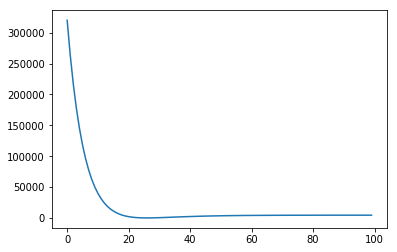

In [8]:
#Univariada  Gradiente Descendente
alfa = 0.001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1

mse = []
for epoch in range (100):
    y_pred = passo(N,arquivo,w0,w1)
    e = calc_error(y_pred,N,arquivo)
    ex = calc_errorx(y_pred,N,arquivo)
    w0 = w0 + (alfa * e)/N
    w1 = w1 + (alfa * ex)/N 
    mse.append(np.mean(e**2))
print(w1)
print(w0)
plt.plot(mse)

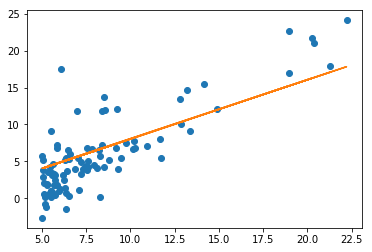

In [20]:
plt.plot(arquivo.values[:,0], arquivo.values[:,1], 'o')
plt.plot(arquivo.values[:,0], passo(N+1,arquivo,w0,w1))

In [5]:
def calc_error(y_pred,N,arquivo):
    e = 0
    for i in range (N):
        yi = arquivo.iat[i,1]
        e = e + yi - y_pred[i]
    return e

def calc_errorx(y_pred,N,arquivo):
    e = 0
    for i in range (N):
        yi = arquivo.iat[i,1]
        xi = arquivo.iat[i,0]
        e = e + (yi - y_pred[i])*xi
    return e

def passo(N,arquivo,w0,w1):
    y_pred = []
    for i in range (N):
        xi= arquivo.iat[i,0]
        ŷ = w0+w1*xi
        y_pred.append(ŷ)
    return y_pred

In [23]:
#Gradiente Estocástico 
def calc_errorw1(y_pred,N,arquivo,i):
    e = 0
    yi = arquivo.iat[i,1]
    xi = arquivo.iat[i,0]
    e = (yi - y_pred[i])*xi
    return e
def calc_errorw0(y_pred,N,arquivo,i):
    e = 0
    yi = arquivo.iat[i,1]
    e = yi - y_pred[i]
    return e
alfa = 0.0001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1
for epoch in range (10):
    y_pred = passo(N,arquivo,w0,w1)
    for i in range (N):     
        e = calc_errorw0(y_pred,N,arquivo,i)
        ex = calc_errorw1(y_pred,N,arquivo,i)
        w0 = w0 + (alfa * e)
        w1 = w1 + (alfa * ex)
print(w0)
print(w1)

0.012461220251567264
0.8030223106636478


In [45]:
#Lendo Dados como Matriz
data_table = pd.read_csv('ex1.csv', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

In [46]:
x.shape

(97, 1)

In [47]:
y = y.reshape(len(y),1)

In [48]:
len(y)

97

In [49]:
x

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [35]:
vetorW = np.zeros(x.shape[0])
#vetorW = vetorW.reshape(len(vetorW),1)
vetorW.shape

(97,)

In [43]:
#Regressao Polinomial 
P =2
alfa = 0.00001
            
if P > 1:
    x_matrix = criar_regressores(x,P)
#for epocas in range(100):
   # error = y - x_matrix @ vetorW
    #vetorW += alfa * np.mean(error[:, None] * x, axis=0)  

/home/362953/miniconda2/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  


array([[ 1.,  1.,  1., ..., inf, inf, inf],
       [ 1.,  1.,  1., ..., inf, inf, inf],
       [ 1.,  1.,  1., ..., inf, inf, inf],
       ...,
       [ 1.,  1.,  1., ..., inf, inf, inf],
       [ 1.,  1.,  1., ..., inf, inf, inf],
       [ 1.,  1.,  1., ..., inf, inf, inf]])

In [36]:
def criar_regressores(x,P):
    regressors = np.hstack((np.ones((x.shape[0], 1)), x))
    
    if P > 1:
        for i in range(2,P+1):        
            regressors = np.hstack((regressors, x**i))        
    return regressors
    

In [19]:
#Regressão Logística 
Gradiente Descendente
alfa = 0.0001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1

for epoch in range (100):
    y_pred = passo(N,arquivo,w0,w1)
    e = calc_error(y_pred,N,arquivo)
    ex = calc_errorx(y_pred,N,arquivo)
    w0 = w0 + (alfa * e)/N
    w1 = w1 + (alfa * ex)/N 
print(w1)
print(w0)

0.4501480444823226
0.037951902486765214


In [ ]:
def calc_logistica(y):
    